In [ ]:
#Importing the necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import sys

#Defining a Nueron
def Nueron(input_value,activation_function,weight,bias):
    output=((weight*input_value)+bias)
    if(activation_function=='ReLu'):
        if(input_value<=0):
            activated_output=0
            return activated_output
        else:
            activated_output=input_value
            return activated_output
    elif(activation_function=='Sigmoid'):
        activated_output=output=1/(1+math.exp(-output))
        return activated_output
    elif(activation_function=='Regression'):
        return output

def update_weight(w,lr,t,o,i,b):
    w=(w-(lr*2*np.mean((t-o)*(-i))))
    b=(b-(lr*2*np.mean((t-o)*(-1))))
    return w,b

#Importing the dataset of a simple linear regression problem from sklearn
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train= diabetes_X[:422, np.newaxis, 2]
diabetes_y=((diabetes_y-min(diabetes_y))/(max(diabetes_y)-min(diabetes_y)))
diabetes_X_test= diabetes_X[422:,2]
diabetes_y_test=diabetes_y[422:,]
activation_function='Regression'
weight=random.random()
bias=random.random()

In [ ]:
#Training the Model
number_of_samples=diabetes_X_train.shape[0]
batch_size=422
number_of_batches=int(number_of_samples/batch_size)
epochs=1000
loss_values=[]
for k in range(epochs):
  print('#################')
  for i in range(number_of_batches):
    input=diabetes_X_train[i*batch_size:(i+1)*batch_size,0]
    target=diabetes_y[i*batch_size:(i+1)*batch_size]
    output=Nueron(input,activation_function,weight,bias)
    loss_function=np.mean((target-output)*(target-output))
    loss_values.append(loss_function)
    print(loss_function,weight)
    #sys.exit(0)
    learning_rate=0.7
    weight,bias=update_weight(weight,learning_rate,target,output,input,bias)

#################
0.047200882336733994 0.9496170351397452
#################
0.04714500574754581 0.9558730649180249
#################
0.04708952542435661 0.9621094882421988
#################
0.047034403147809746 0.9683260475466149
#################
0.04697963093741451 0.974522933701808
#################
0.046925205662715984 0.9807001579251861
#################
0.04687112498100121 0.9868578030178359
#################
0.04681738668725671 0.9929959228706023
#################
0.04676398861008785 0.9991145826625656
#################
0.04671092859499239 1.0052138427825121
#################
0.046658204501611525 1.0112937652612235
#################
0.046605814203217515 1.0173544111994275
#################
0.046553755586559775 1.0233958417974853
#################
0.04650202655176869 1.02941811794438
#################
0.04645062501226923 1.0354213003829813
#################
0.046399548894696475 1.0414054496447989
#################
0.04634879613881191 1.047370626076936
#################
0.04629836

In [ ]:
#Evaluating the model
diabetes_X_test
diabetes_y_test
prediction=((weight*diabetes_X_test)+bias)
print(prediction)
prediction.shape

[0.61970608 0.28600748 0.42989587 0.28294602 0.30131475 0.41458859
 0.65032063 0.30437621 0.2370242  0.31049912 0.55541552 0.22783983
 0.40234277 0.33192931 0.18804092 0.45438751 0.35335949 0.35335949
 0.5094937  0.19110237]


(20,)

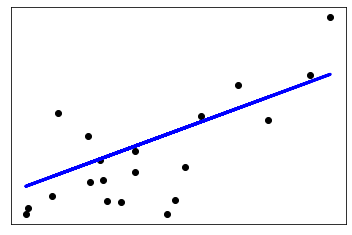

In [ ]:
#Plotting the Test Predictions comparing with actuals
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, prediction, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()